Output()

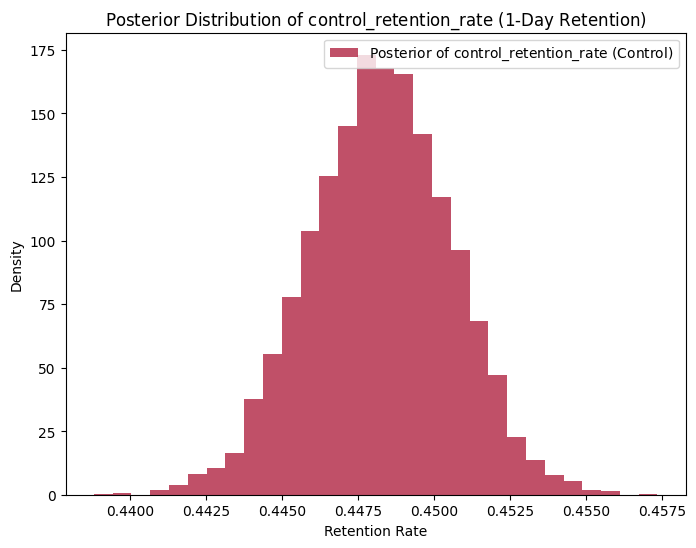

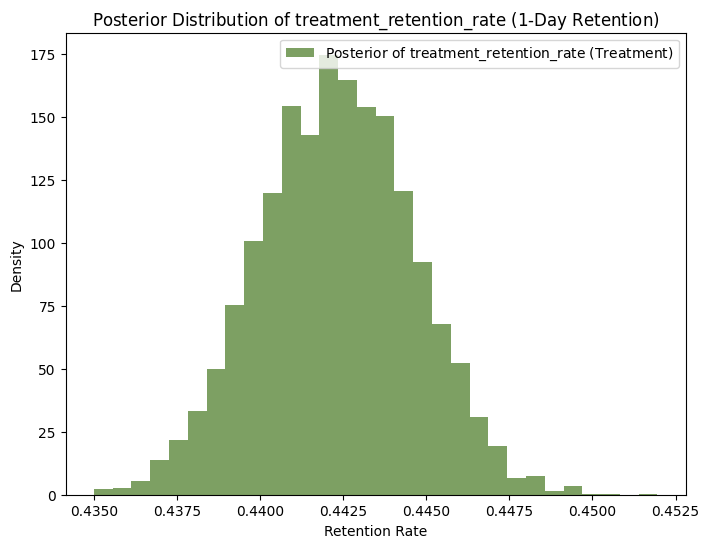

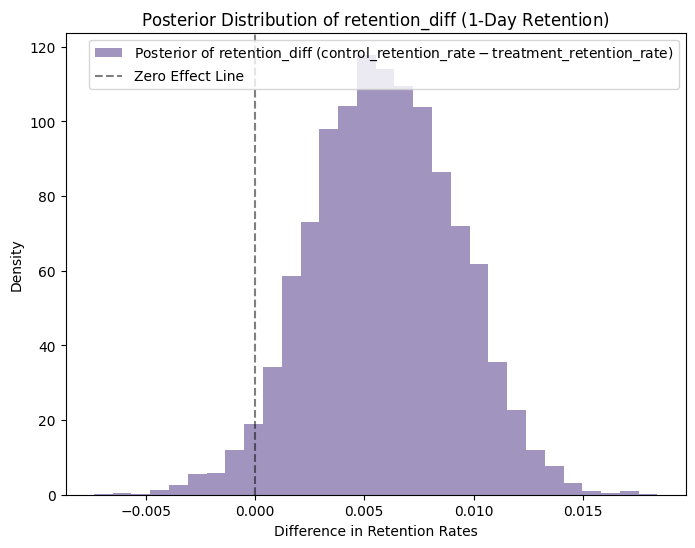

In [9]:
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2024)

data = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv")

# 1-Day Retention Model
with pm.Model() as model_1day:
    control_retention_rate = pm.Beta("control_retention_rate", alpha=1, beta=1)
    treatment_retention_rate = pm.Beta("treatment_retention_rate", alpha=1, beta=1)
    retention_diff = pm.Deterministic("retention_diff", control_retention_rate - treatment_retention_rate)

    control_obs = pm.Bernoulli("control_obs", control_retention_rate, observed=data.loc[data['version'] == 'gate_30', 'retention_1'])
    treatment_obs = pm.Bernoulli("treatment_obs", treatment_retention_rate, observed=data.loc[data['version'] == 'gate_40', 'retention_1'])

    trace_1day_retention = pm.sample(2000, tune=1000, cores=2)

control_retention_rate_samples_1day = trace_1day_retention.posterior["control_retention_rate"].values.flatten()
treatment_retention_rate_samples_1day = trace_1day_retention.posterior["treatment_retention_rate"].values.flatten()
retention_diff_samples_1day = trace_1day_retention.posterior["retention_diff"].values.flatten()

plt.figure(figsize=(8, 6))
plt.hist(control_retention_rate_samples_1day, bins=30, color="#A60628", alpha=0.7, density=True, label="Posterior of $\\mathrm{control\\_retention\\_rate}$ (Control)")
plt.title("Posterior Distribution of $\\mathrm{control\\_retention\\_rate}$ (1-Day Retention)")
plt.xlabel("Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(treatment_retention_rate_samples_1day, bins=30, color="#467821", alpha=0.7, density=True, label="Posterior of $\\mathrm{treatment\\_retention\\_rate}$ (Treatment)")
plt.title("Posterior Distribution of $\\mathrm{treatment\\_retention\\_rate}$ (1-Day Retention)")
plt.xlabel("Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(retention_diff_samples_1day, bins=30, color="#7A68A6", alpha=0.7, density=True, label="Posterior of $\\mathrm{retention\\_diff}$ ($\\mathrm{control\\_retention\\_rate} - \\mathrm{treatment\\_retention\\_rate}$)")
plt.axvline(0, color="black", linestyle="--", alpha=0.5, label="Zero Effect Line")
plt.title("Posterior Distribution of $\\mathrm{retention\\_diff}$ (1-Day Retention)")
plt.xlabel("Difference in Retention Rates")
plt.ylabel("Density")
plt.legend()
plt.show()


Output()

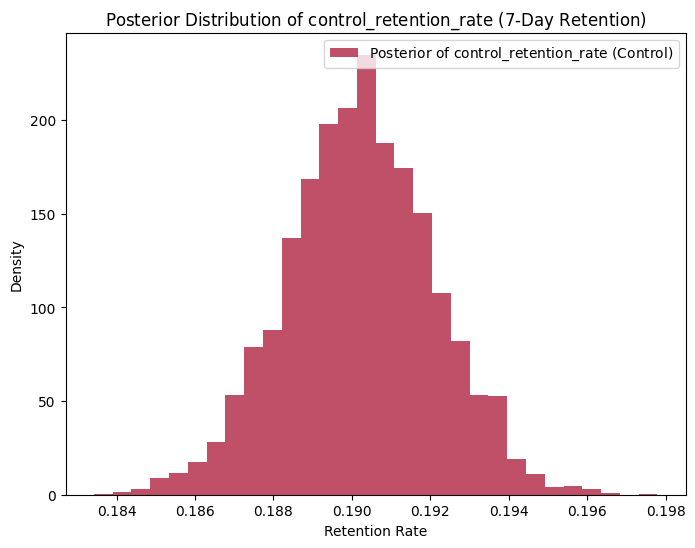

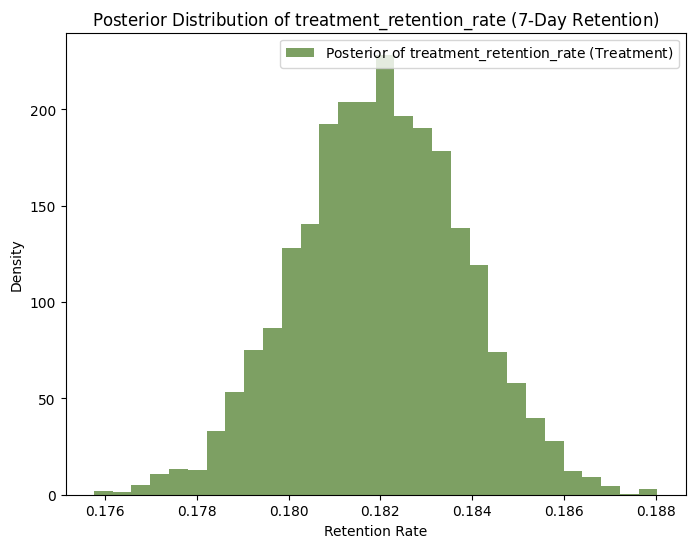

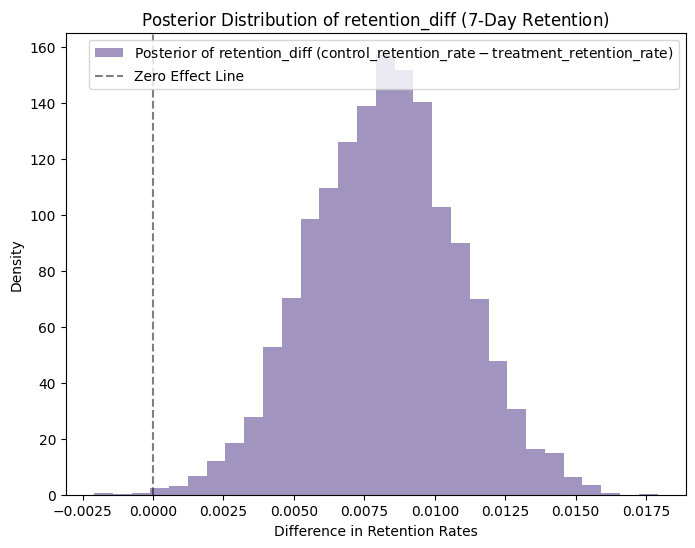

Probability retention_diff > 0 (1-Day Retention): 0.9675
Probability retention_diff > 0 (7-Day Retention): 0.9982


In [8]:
# 7-Day Retention Model
with pm.Model() as model_7day:
    control_retention_rate = pm.Beta("control_retention_rate", alpha=1, beta=1)
    treatment_retention_rate = pm.Beta("treatment_retention_rate", alpha=1, beta=1)
    retention_diff = pm.Deterministic("retention_diff", control_retention_rate - treatment_retention_rate)

    control_obs = pm.Bernoulli("control_obs", control_retention_rate, observed=data.loc[data['version'] == 'gate_30', 'retention_7'])
    treatment_obs = pm.Bernoulli("treatment_obs", treatment_retention_rate, observed=data.loc[data['version'] == 'gate_40', 'retention_7'])

    trace_7day_retention = pm.sample(2000, tune=1000, cores=2)

control_retention_rate_samples_7day = trace_7day_retention.posterior["control_retention_rate"].values.flatten()
treatment_retention_rate_samples_7day = trace_7day_retention.posterior["treatment_retention_rate"].values.flatten()
retention_diff_samples_7day = trace_7day_retention.posterior["retention_diff"].values.flatten()

# 7-Day Retention Plots
plt.figure(figsize=(8, 6))
plt.hist(control_retention_rate_samples_7day, bins=30, color="#A60628", alpha=0.7, density=True,
         label="Posterior of $\\mathrm{control\\_retention\\_rate}$ (Control)")
plt.title("Posterior Distribution of $\\mathrm{control\\_retention\\_rate}$ (7-Day Retention)")
plt.xlabel("Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(treatment_retention_rate_samples_7day, bins=30, color="#467821", alpha=0.7, density=True,
         label="Posterior of $\\mathrm{treatment\\_retention\\_rate}$ (Treatment)")
plt.title("Posterior Distribution of $\\mathrm{treatment\\_retention\\_rate}$ (7-Day Retention)")
plt.xlabel("Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(retention_diff_samples_7day, bins=30, color="#7A68A6", alpha=0.7, density=True,
         label="Posterior of $\\mathrm{retention\\_diff}$ ($\\mathrm{control\\_retention\\_rate} - \\mathrm{treatment\\_retention\\_rate}$)")
plt.axvline(0, color="black", linestyle="--", alpha=0.5, label="Zero Effect Line")
plt.title("Posterior Distribution of $\\mathrm{retention\\_diff}$ (7-Day Retention)")
plt.xlabel("Difference in Retention Rates")
plt.ylabel("Density")
plt.legend()
plt.show()

# Print probabilities
print(f"Probability retention_diff > 0 (1-Day Retention): {(retention_diff_samples_1day > 0).mean():.4f}")
print(f"Probability retention_diff > 0 (7-Day Retention): {(retention_diff_samples_7day > 0).mean():.4f}")